In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#load data
df = pd.read_csv(r'C:\Users\eliascas\Downloads\reporting_Clients_export.csv')


In [40]:
# sanity check
df.head(5)


,Timestamp,Tenant,UserAgentVer,OS,CLR,LibTarget,Stamp,env_cloud_deploymentUnit,Hostname,InstanceEnvironment,CertificateSubject,UserAgent,env_cloud_environment,env_cloud_location,ClientVersion,UserAgentVer_Changed,Week,Month
0,2023-07-13 10:00:00+00:00,3rd_party,1.4.02109.81,Win32NT 10.0.17763.0,.NET CLR 4.0.30319.42000,net462,id,clip3-plat-id-westus3-prod-1,westcentralus.throttle.msidentity.com,ProdSlices,CN=throttlingclient3pcert.pas.windows.net,ThrottlingClient/1.4.02109.81 (compatible; MSI...,prod,westus3,1.4.02109.81,False,28,7
1,2023-07-13 11:00:00+00:00,3rd_party,1.4.02109.81,Win32NT 10.0.17763.0,.NET CLR 4.0.30319.42000,net462,id,clip3-plat-id-westus3-prod-1,westcentralus.throttle.msidentity.com,TestSlice,CN=throttlingclient3pcert.pas.windows.net,ThrottlingClient/1.4.02109.81 (compatible; MSI...,prod,westus3,1.4.02109.81,False,28,7
2,2023-07-13 02:00:00+00:00,aadap,1.1.1490.1214,Win32NT 6.2.9200.0,.NET CLR 4.0.30319.42000,NaN,NaN,<null>,cu.throttle.dc.ad.msft.net,PORTO-CANARY,CN=throttleclient.msappproxy.net,ThrottlingClient/1.1.1490.1214 (compatible; MS...,<null>,<null>,1.1.1490.1214,False,28,7
3,2023-07-13 05:00:00+00:00,aadap,1.1.1490.1214,Win32NT 10.0.17763.0,.NET CLR 4.0.30319.42000,NaN,id,clip3-plat-id-northcentralus-prod-1,cu.throttle.dc.ad.msft.net,CANARY,CN=throttleclient.msappproxy.net,ThrottlingClient/1.1.1490.1214 (compatible; MS...,prod,northcentralus,1.1.1490.1214,False,28,7
4,2023-07-13 06:00:00+00:00,aadap,1.1.1490.1214,Win32NT 10.0.17763.0,.NET CLR 4.0.30319.42000,NaN,id,clip3-plat-id-koreasouth-prod-1,apac.throttle.dc.ad.msft.net,JAPAN1,CN=throttleclient.msappproxy.net,ThrottlingClient/1.1.1490.1214 (compatible; MS...,prod,koreasouth,1.1.1490.1214,False,28,7


In [42]:
# Define your tenant name
tenant_name = '3rd_party'

# Filter data for the specific tenant
df_tenant = df[df['Tenant'] == tenant_name].copy() 

# Ensure 'Timestamp' column is of datetime type
df_tenant['Timestamp'] = pd.to_datetime(df_tenant['Timestamp'])

# Sort data by 'Timestamp'
df_tenant = df_tenant.sort_values('Timestamp')

# Print the version changes
print(df_tenant[['Timestamp', 'UserAgentVer']])


                  Timestamp  UserAgentVer
0 2023-07-13 10:00:00+00:00  1.4.02109.81
1 2023-07-13 11:00:00+00:00  1.4.02109.81


In [44]:
#sanity check

# Define your tenant name
tenant_name = '3rd_party'

# Filter data for the specific tenant and get unique timestamps
unique_timestamps = df[df['Tenant'] == tenant_name]['Timestamp'].unique()

# Print the unique timestamps
for timestamp in unique_timestamps:
    print(timestamp)

2023-07-13 10:00:00+00:00
2023-07-13 11:00:00+00:00


Goal: create a visualization that shows when a tenant changed client versions using the "Timestamp", we can use matplotlib or seaborn library in Python.

However, this problem assumes that each "Tenant" would have a monotonically increasing "Timestamp" with potentially different "UserAgentVer" at each time.

Here's a simple approach:

1. First, we sort the DataFrame based on "Tenant" and "Timestamp".
2. Then, we create a new column "UserAgentVer_Changed" that will contain boolean values, indicating whether the "UserAgentVer" changed compared to the previous row.

In [37]:
# Sort DataFrame by 'Tenant' and 'Timestamp'
df = df.sort_values(['Tenant', 'Timestamp'])

# Create a new column 'UserAgentVer_Changed'
df['UserAgentVer_Changed'] = df['UserAgentVer'].ne(df['UserAgentVer'].shift()) & df['Tenant'].eq(df['Tenant'].shift())

# Ensure datetime type 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# extract unique tenants
chosen_tenants = df['Tenant'].unique().tolist()

# Create a new column 'Month' to store the month of the year when the change occurred
df['Month'] = df['Timestamp'].dt.month



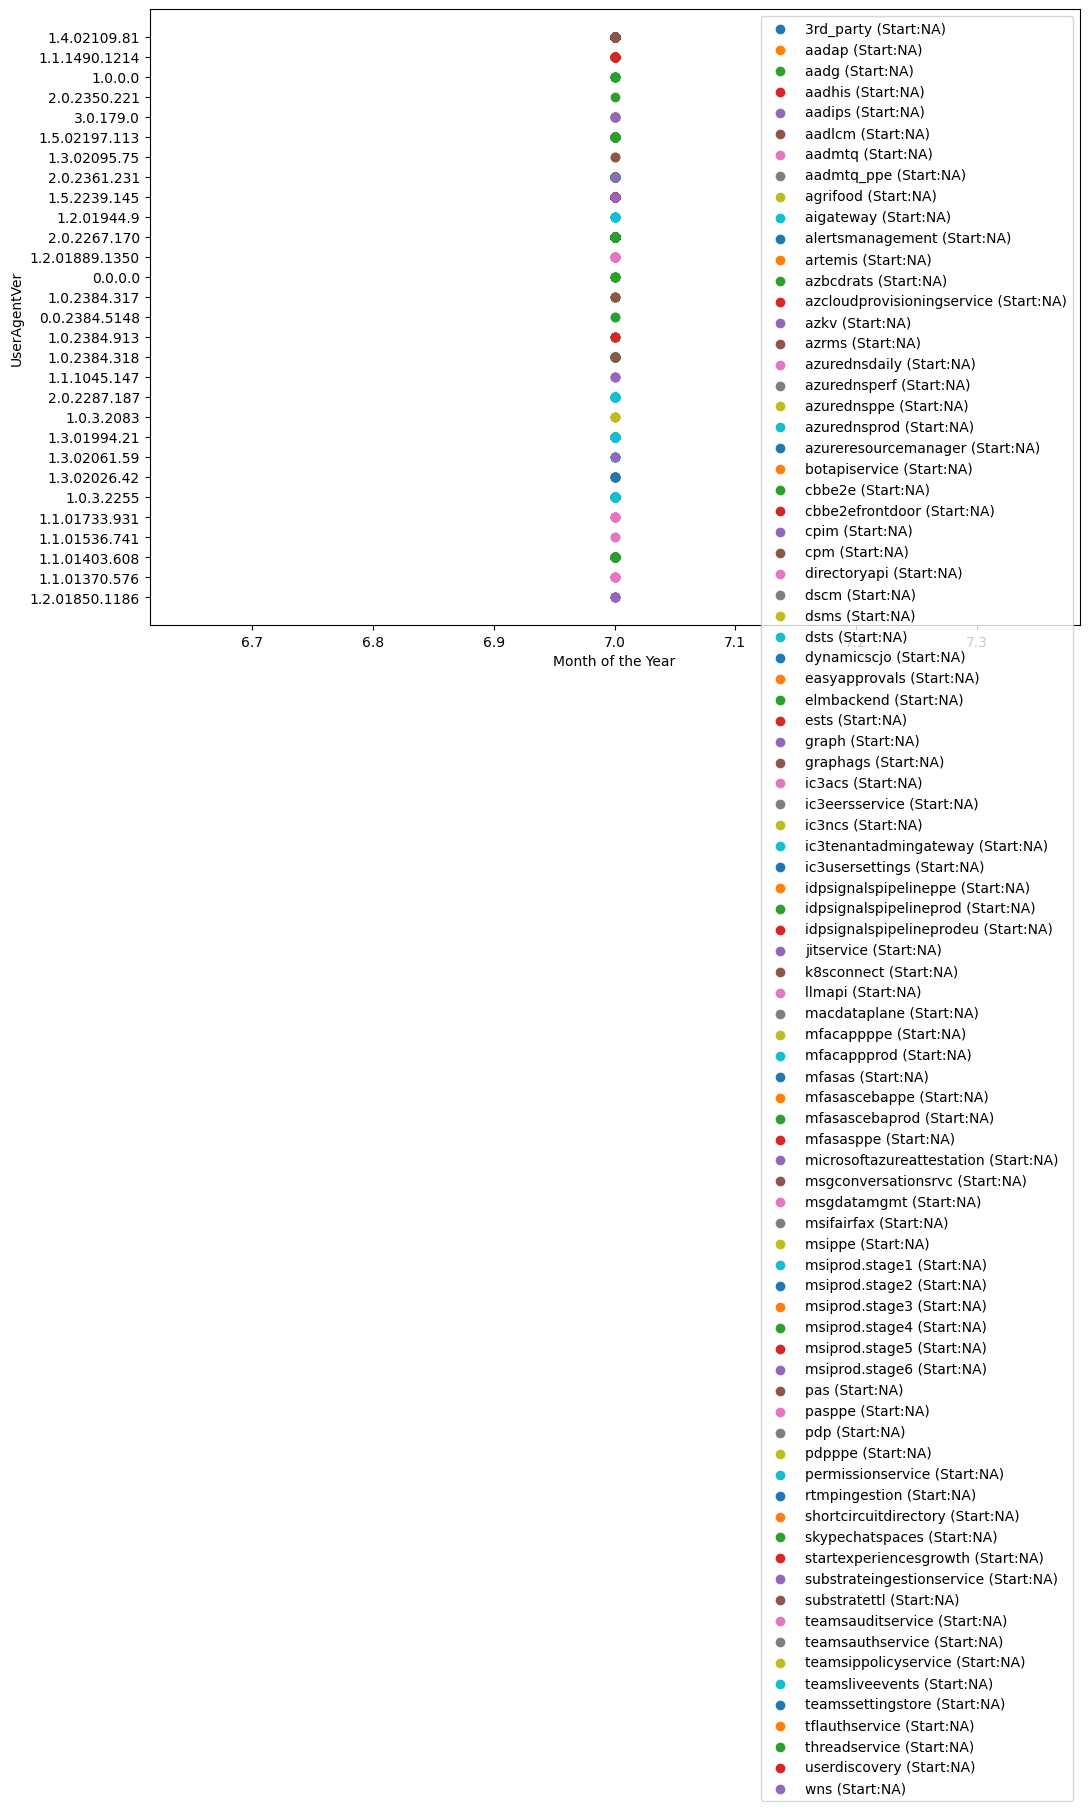

In [38]:
# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plotting each tenant's UserAgentVer changes
for tenant in chosen_tenants:
    df_tenant = df[df['Tenant'] == tenant]
    start_ver = df_tenant[df_tenant['Month'] == 1]['UserAgentVer'].values[0] if not df_tenant[df_tenant['Month'] == 1]['UserAgentVer'].empty else 'NA'  
    plt.scatter(df_tenant['Month'], df_tenant['UserAgentVer'], label=f'{tenant} (Start:{start_ver})')

plt.xlabel('Month of the Year')
plt.ylabel('UserAgentVer')
plt.gca().invert_yaxis()  # Invert y-axis
plt.legend()
plt.show()